In [212]:
import cfgrib


import numpy as np
import xarray as xr

Load .grib dataset for an entire year and create an array that is [n_hours, lat, lon] in shape. 

Each entry in axis=0 will be the mean for that hour over the year. 

In [219]:
in_f = '/Users/danve/Downloads/adaptor.mars.internal-1701746509.4547176-31034-8-90921acd-0793-4a11-a15b-aafa20fec216.grib'

arr = cfgrib.open_datasets(in_f)
xarr = arr[0]

In [220]:
xarr = xarr.assign(total_wind_speed = np.sqrt(xarr.u100**2 + xarr.v100**2))

In [221]:
grouped = xarr.groupby(xarr.time.dt.hour).mean()

In [222]:
np.array(grouped.coords['latitude'])

array([18.9 , 18.65, 18.4 , 18.15, 17.9 , 17.65, 17.4 ])

In [223]:
np.array(grouped.coords['longitude'])

array([-68.  , -67.75, -67.5 , -67.25, -67.  , -66.75, -66.5 , -66.25,
       -66.  , -65.75, -65.5 , -65.25, -65.  , -64.75, -64.5 , -64.25,
       -64.  , -63.75, -63.5 , -63.25, 297.  ])

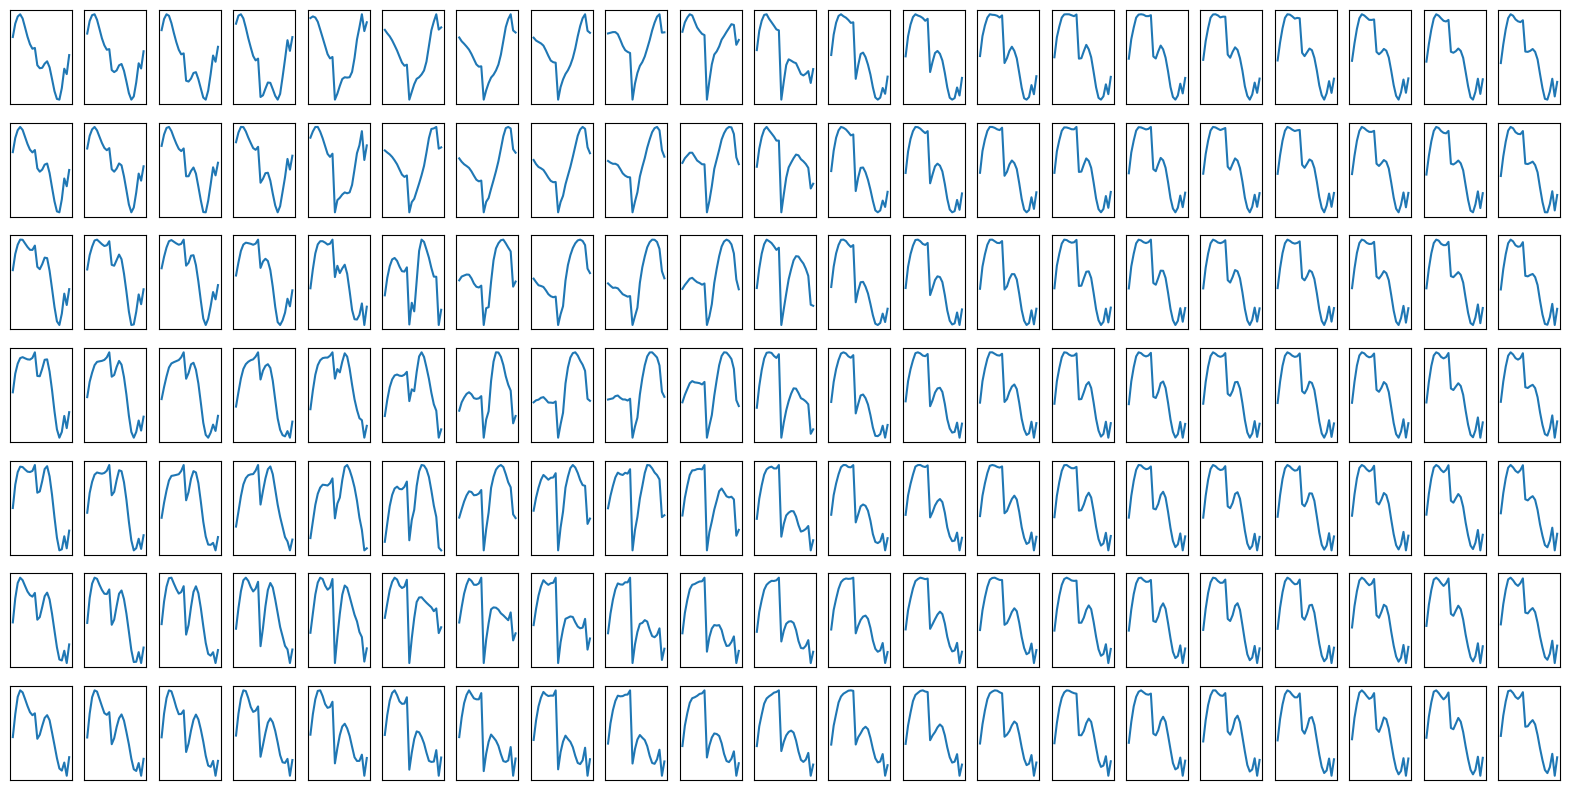

In [202]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(
    nrows=grouped.coords['latitude'].shape[0], 
    ncols=grouped.coords['longitude'].shape[0], 
    figsize=(20, 10))

i = 0
for lat in np.array(grouped.coords['latitude']):
    j = 0
    for lon in np.array(grouped.coords['longitude']):        
        mean_hourly_wind_speed = np.array(grouped.loc[{'latitude': lat, 'longitude': lon}].total_wind_speed)
        
        ax[i, j].plot(mean_hourly_wind_speed)

        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)

        j += 1

    i += 1

In [203]:
grouped

<xarray.Dataset>
Dimensions:           (latitude: 7, longitude: 21, hour: 24)
Coordinates:
    number            int64 0
    step              timedelta64[ns] 00:00:00
    surface           float64 0.0
  * latitude          (latitude) float64 18.9 18.65 18.4 18.15 17.9 17.65 17.4
  * longitude         (longitude) float64 -68.0 -67.75 -67.5 ... -63.25 297.0
  * hour              (hour) int64 0 1 2 3 4 5 6 7 8 ... 16 17 18 19 20 21 22 23
Data variables:
    u100              (hour, latitude, longitude) float32 -6.095 ... -6.432
    v100              (hour, latitude, longitude) float32 -0.8123 ... -0.7925
    total_wind_speed  (hour, latitude, longitude) float32 6.884 7.047 ... 6.95
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

In [211]:
grouped.to_netcdf("../../data/generation_and_demand/2019_wind_speeds.nc")

array([6.8838105, 7.149816 , 7.289755 , 7.334783 , 7.2510977, 7.072154 ,
       6.8876324, 6.7407427, 6.651044 , 6.666999 , 6.324147 , 6.2645636,
       6.272627 , 6.354924 , 6.401362 , 6.282952 , 6.0506115, 5.8096313,
       5.6552606, 5.6411967, 5.870867 , 6.254614 , 6.1476955, 6.5252085],
      dtype=float32)

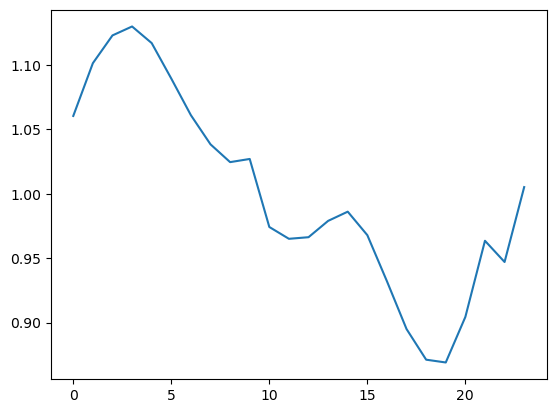

In [233]:
grouped_array = np.array(grouped.loc[{'latitude': 18.9, 'longitude': -68}].total_wind_speed)

plt.plot(grouped_array/np.mean(grouped_array))